## Demo

Loading data	5.31 s
Preparing input	12.61 s
Fitting	117.79 s
pair_coeff	1 1 0   0   0   0   0   0   0   25658823.02487283  0   0   0   0   0   -833811335621.7706  0   



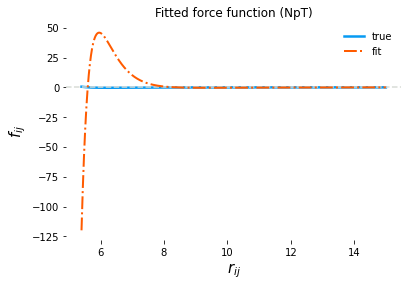

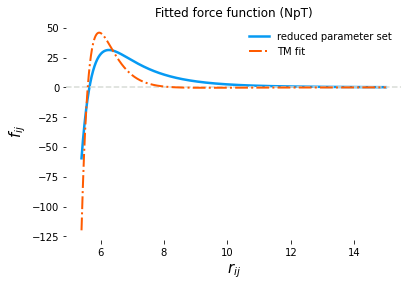

In [1]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 0.75 / x * (2 * (5/x) ** 12 - (5/x) ** 6)
def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p
params = range(-1, -15, -2)

steps_between_points = 4
configurations = 1500
outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/trajectory_match/lj_test_gamma_demo.out"
small_atom_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=15,
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

small_atom_tm.prepare_training_data()
small_atom_tm.fit()

x = np.linspace(5.4, 15, 10000)
y_fit = small_atom_tm.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y) #, thermostat='NpT', output_path="/home/markjenei/polymerisation-coarse-graining/lj_test/small_npt.png")
best_params, best_weights = small_atom_tm.best_subset((-7, -13), x, print_coeffs=True, plot=True)

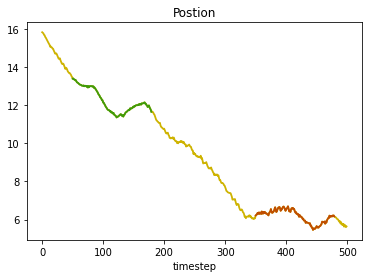

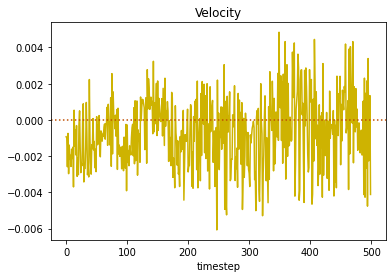

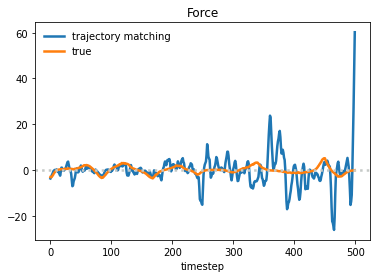

In [24]:
import misc
import matplotlib.pyplot as plt
i = 0 # try self.t = 4 and i = 2 for good gamma explanation (lj_test_gamma_demo.out)
asd = 500
plt.plot(small_atom_tm.r[:, i, 0][0:asd], lw=1.8, color='xkcd:mustard')
plt.plot(np.arange(50, 180, 1),small_atom_tm.r[:, i, 0][50:180], lw=1.8, color='xkcd:grass green')
plt.plot(np.arange(350, 480, 1), small_atom_tm.r[:, i, 0][350:480], lw=1.8, color='xkcd:burnt orange')
plt.xlabel("timestep")
plt.title("Postion")
plt.savefig("/home/markjenei/polymerisation-coarse-graining/lj_test/trajectory_match/test_r.png", bbox_inches="tight")
plt.show()

#v_ = misc.lowess(small_atom_tm.v[:, i, 0][0:asd], f=0.02, iter=5)
plt.title("Velocity")
plt.plot(small_atom_tm.v[:, i, 0][0:asd], lw=1.5, color='xkcd:mustard')
plt.axhline(0, color='xkcd:burnt orange', ls=':')
#plt.plot(v_[0:asd])
plt.xlabel("timestep")
plt.savefig("/home/markjenei/polymerisation-coarse-graining/lj_test/trajectory_match/test_v.png", bbox_inches="tight")
plt.show()

f = small_atom_tm.f[:, i, 0][0:asd]

a_fit = misc.lowess(small_atom_tm.a[:, i, 0][0:asd], f=0.02, iter=5) * 340.42  * small_atom_tm.timestep ** 2

plt.title("Force")
plt.plot(a_fit , label='trajectory matching', lw=2.5)
plt.plot(f, label='true', lw=2.5)
plt.axhline(0, color='xkcd:silver', ls=':', lw=2.5)
plt.xlabel("timestep")
plt.legend(frameon=False)
plt.savefig("/home/markjenei/polymerisation-coarse-graining/lj_test/trajectory_match/test_f.png", bbox_inches="tight")
plt.show()

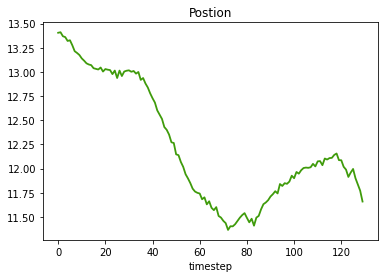

In [25]:
i = 0 # try self.t = 4 and i = 2 for good gamma explanation (lj_test_gamma_demo.out)
asd = 500
plt.plot(small_atom_tm.r[:, i, 0][50:180], lw=1.8, color='xkcd:grass green')
plt.xlabel("timestep")
plt.title("Postion")
plt.savefig("/home/markjenei/polymerisation-coarse-graining/lj_test/trajectory_match/test_r_good.png", bbox_inches="tight")
plt.show()

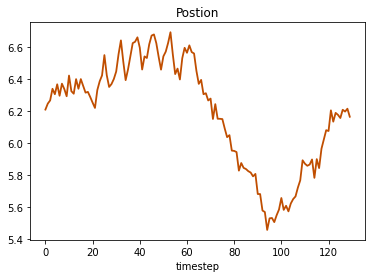

In [26]:
i = 0 # try self.t = 4 and i = 2 for good gamma explanation (lj_test_gamma_demo.out)
asd = 500
plt.plot(small_atom_tm.r[:, i, 0][350:480], lw=1.8, color='xkcd:burnt orange')
plt.xlabel("timestep")
plt.title("Postion")
plt.savefig("/home/markjenei/polymerisation-coarse-graining/lj_test/trajectory_match/test_r_bad.png", bbox_inches="tight")
plt.show()